In [93]:
#Importing packages
using Plots
using StatsBase
using StatsPlots
using Distributions
using LinearAlgebra
using LaTeXStrings
using CSV, DataFrames
using Random

## Random Matrix Theory (RMT)

A random matrix is a matrix having all its entries as random variables. Random Matrices are used in many areas where we need to study the statistics of the ensemble. RMT was first developed to model atomic nuclei. 

We consider the matrices whose elements follow the Gaussian/Normal distribution. We call them Gaussian Ensemble. There are 3 types of Gaussian Ensembles:

-  Gaussian Orthogonal Ensemble (GOE)
-  Gaussian Unitary Ensemble (GUE)
-  Gaussian Symplecti Ensemble (GSE)


### Gaussian Orthogonal Ensemble

These consists of $N \times N$ real, symmetric matrices whose elements follow the Normal distribution.
For example, if $H$ be such a $N \times N$ matrix, then $X_{ij} \sim Normal(0,1) \ \forall \ i,j \leq N$ 

In [165]:
#Defining a function to generate a GOE matrix
function H_GOE(n)
    A=rand(Normal(0,1), n,n)
    Q=(A+transpose(A))/2
    Q
    end

H_GOE (generic function with 1 method)

In [111]:
l=[]
for i = 1:10000
    A= H_GOE(100)
    #imposing normalisation condition
    A= A.*sqrt(100/tr(A*A))
    #calculating eigenvalues
    q=eigvals(A)
    for j in q 
        append!(l,j)
    end
end

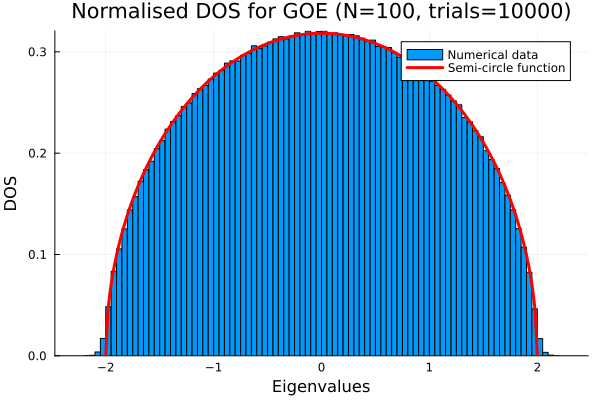

In [113]:
histogram(l,norm=true, title="Normalised DOS for GOE (N=100, trials=10000)", label="Numerical data", xlabel="Eigenvalues", ylabel="DOS")
#Plotting semi-circle analytic function
a=LinRange(-2,2, 200)
y = (1/pi)*sqrt.((1 .- a.^2/4))
plot!(a,y, lw=3, label="Semi-circle function", color="red")

### Gaussian Unitary Ensemble

These consists of $N \times N$ Hermitian matrices whose elements follow the complex Normal distribution.
For example, if $H$ be such a $N \times N$ matrix, then $X_{ij} \sim Normal(0,1) + \mathrm{i}\ Normal(0,1)\ \forall \ i,j \leq N$ 

In [100]:
#Defining a function to generate eigenvalues of a GUE matrix
function H_GUE(n)
    H=complex(zeros(n,n));
    for i = 1 : n
        for j = 1 : n
            H[i,j]=rand(Normal(0,1))+ rand(Normal(0,1))im
        end
    end
    #Making a hermitian matrix from H
    Hs=(H+H')/2
    Hs
    end

H_GUE (generic function with 2 methods)

In [101]:
l1=[]
for i = 1:10000
    A= H_GUE(100)
    #imposing normalisation condition
    A= A.*sqrt(100/tr(A*A))
    #calculating eigenvalues
    q=eigvals(A)
    for j in q 
        append!(l1,j)
    end
end

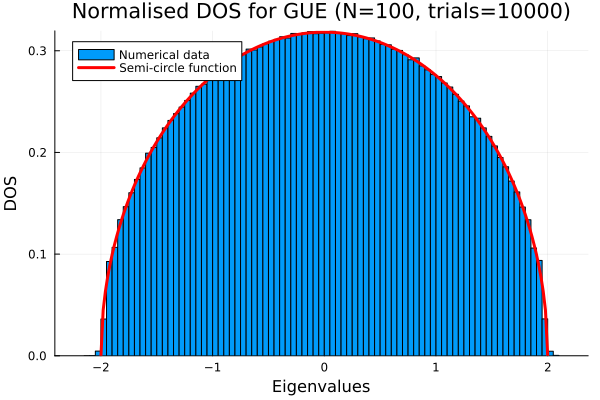

In [105]:
histogram(real(l1),norm=true, title="Normalised DOS for GUE (N=100, trials=10000)", label="Numerical data", xlabel="Eigenvalues", ylabel="DOS")
#Plotting semi-circle analytic function
a=LinRange(-2,2, 200)
y = (1/pi)*sqrt.((1 .- a.^2/4))
plot!(a,y, lw=3, label="Semi-circle function", color="red")

**Now, we will compare the GOE and GUE distributions for different values of N**

In [171]:
#function which generates a plot for GOE and GUE given matrix dimension n and number of trials t 
function plots(n,t)
    l=[]
    trials=t
    for i = 1:t

        A= H_GOE(n)
        #imposing normalisation condition
        #A= A.*sqrt(n/tr(A*A))
        #calculating eigenvalues
        q=eigvals(A)
        for j in q 
            append!(l,(1/sqrt(2*n))*j)
        end
    end
    l1=[]
    for i = 1:t
        A= H_GUE(n)
        #imposing normalisation condition
        #A= A.*sqrt(n/tr(A*A))
        #calculating eigenvalues
        q=eigvals(A)
        for j in q 
            append!(l1,(1/sqrt(4*n))*j)
        end
    end
    p1=density(l,norm=true, title="(N=$n, trials=$t)", label="GOE", xlabel="Eigenvalues", ylabel="DOS");
    p2= density!(real(l1),norm=true, label="GUE");
    p2
end

plots (generic function with 2 methods)

In [ ]:
#Plotting 
plotss=[plots(i,10000) for i in [2,4,8,16,32, 64]]

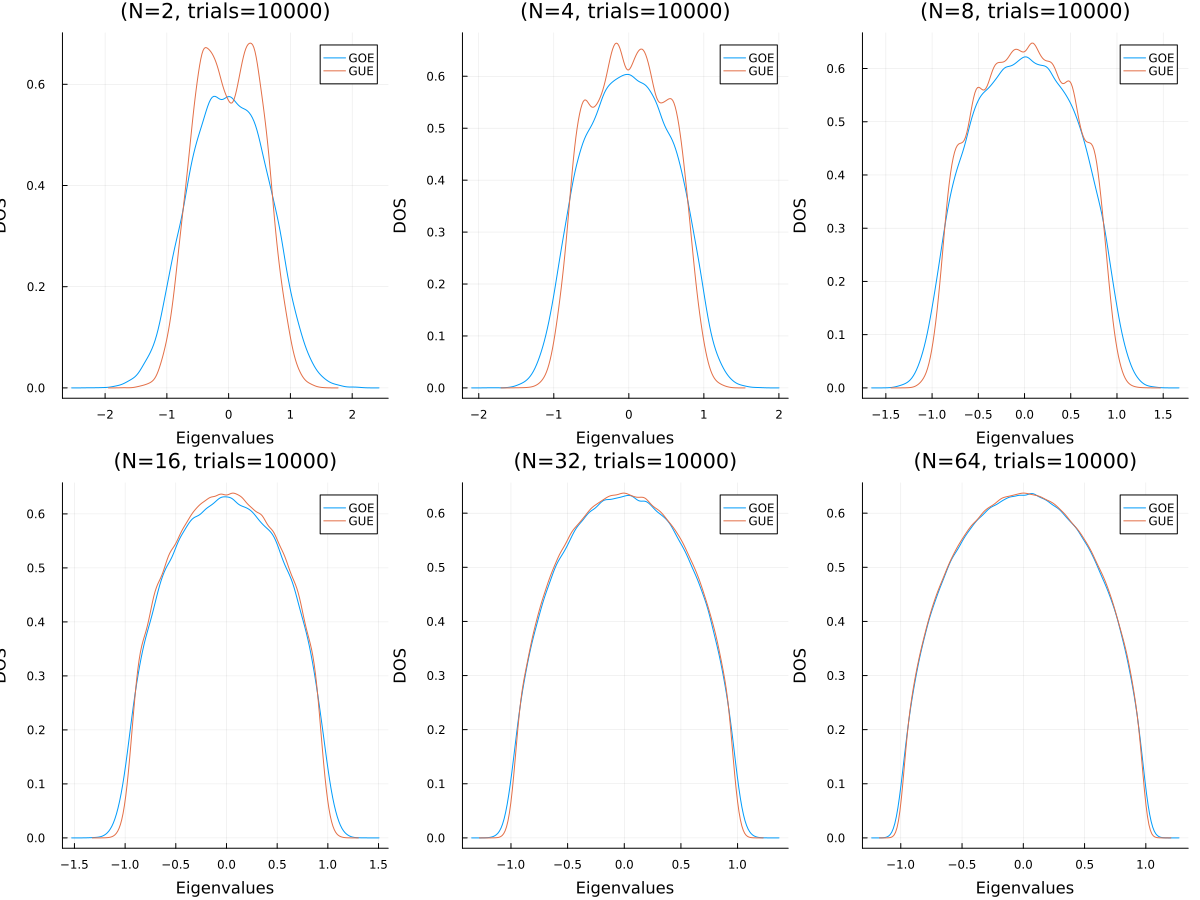

In [175]:
plot(plotss...,size=(1200,900))